In [1]:
cd(@__DIR__)
include(raw"utils\utils.jl")

Undrift!

Making a calendar of 100 years

In [2]:
try 
    using Dates
catch ; 
    import Pkg
    Pkg.add("Dates")
    using Dates
end
k=100
DatesRange=collect(Date(1900):Day(1):Date(1900+k))
N=length(DatesRange)

36525

# AR model on the whole series

## AR(1)

In [3]:
x0=-3.
Φ,σ=0.6,6

(0.6, 6)

In [4]:
include("utils/Simulation.jl")
x=[x0 ; simulation(x0,Φ,σ,N-length(x0))]

36525-element Vector{Float64}:
  -3.0
 -12.880250013225318
  -5.574456070172559
  -1.00850545416773
 -12.324762416160985
 -15.843035294903551
 -14.912439518378914
 -13.365100368414117
  -9.622595222183113
 -10.895051301951533
   ⋮
 -12.35927747796256
  -8.277724588307512
 -12.802600013432912
  -3.672812562158584
  -0.4321964775282905
   1.8081636992894397
  -2.284080424593964
  -8.539251974842301
 -18.115019148231397

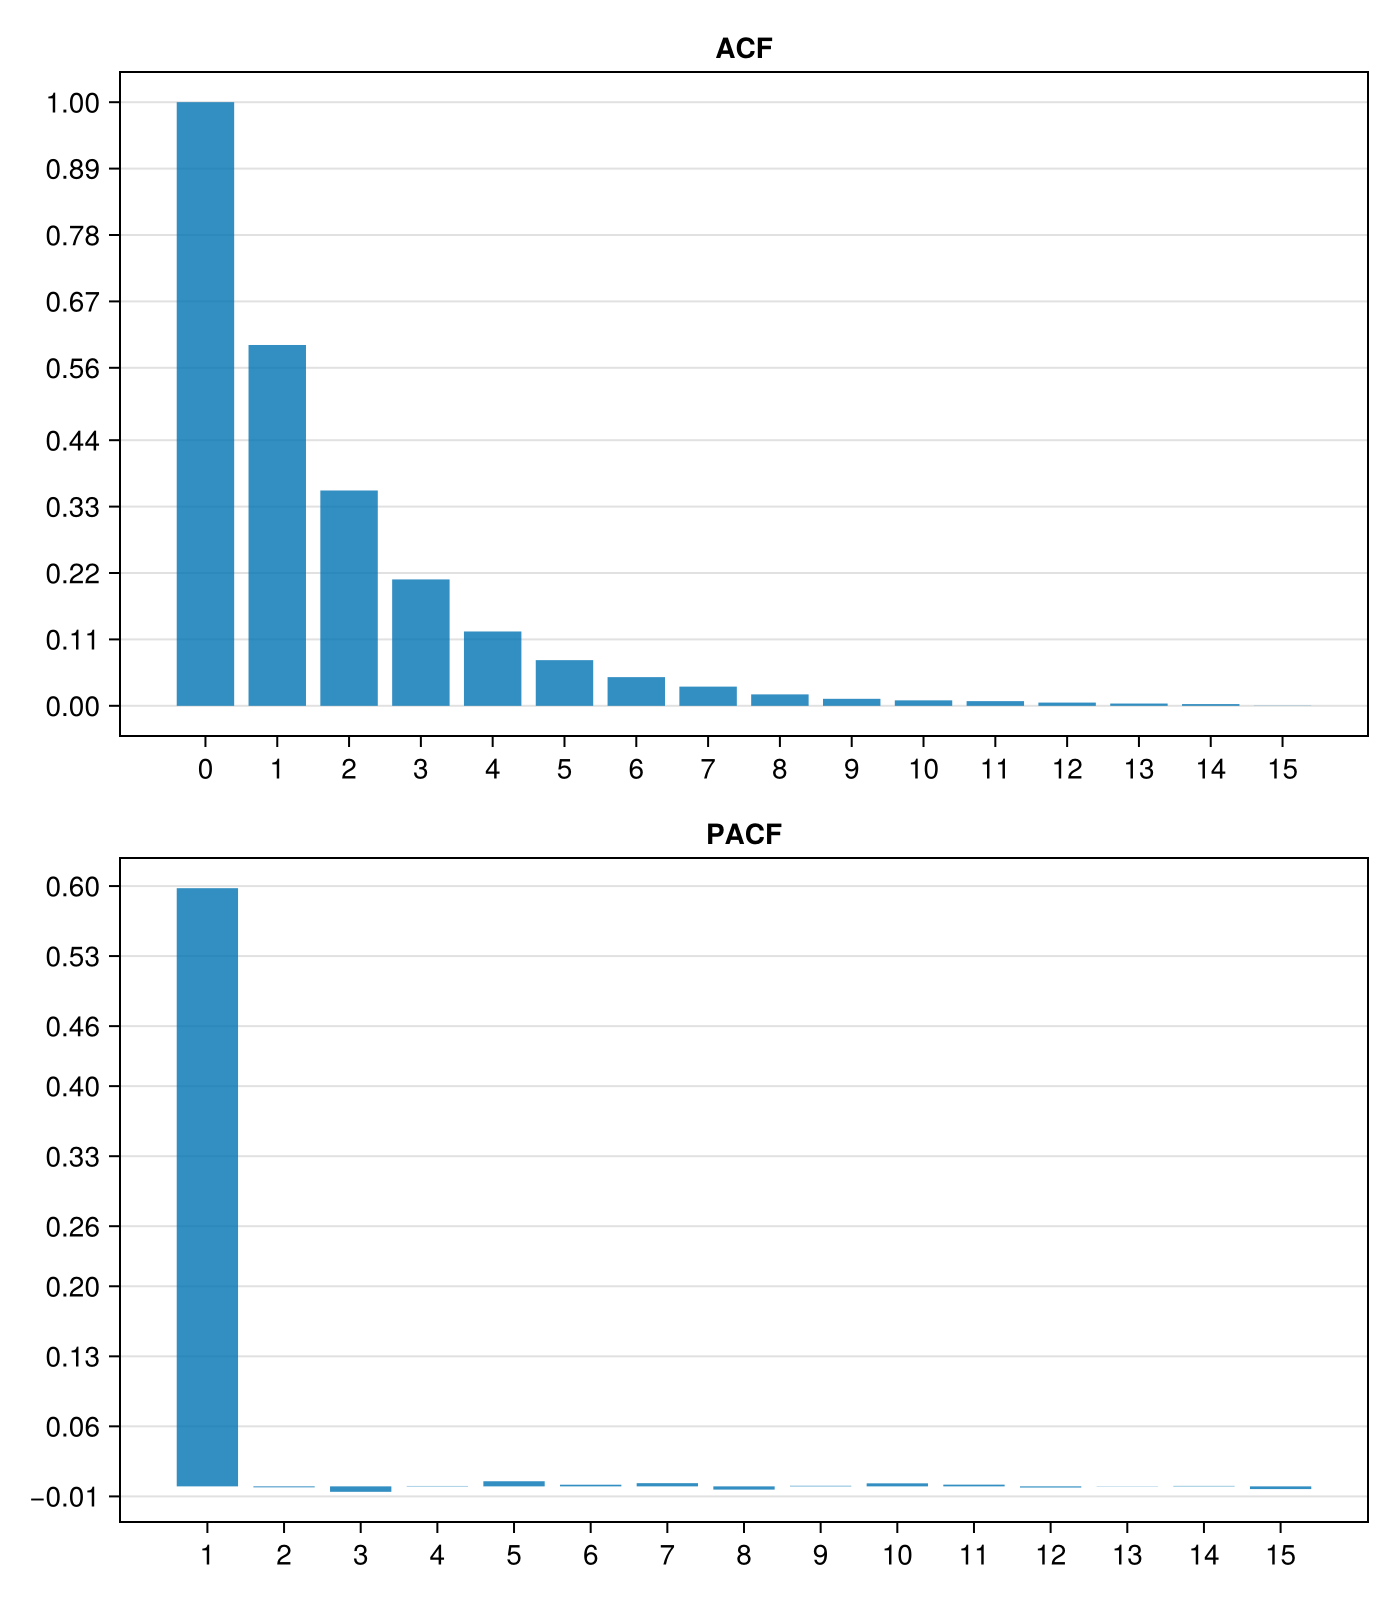

In [5]:
include("utils/ACF_PACF.jl")
ACF_PACF(x)

In [6]:
include("utils/Estimation.jl")
Parameters_est=LL_AR_Estimation(x,1)
Φ_hat,  σ_hat=Parameters_est[1][1], Parameters_est[2]
table = DataFrame("Parameters"=>"Φ", "Error"=>abs(Φ_hat-Φ), "Percentage error"=>100*abs(Φ_hat-Φ)/abs(Φ))
push!(table,("σ",abs(σ_hat-σ),100*abs(σ_hat-σ)/abs(σ)))

Row,Parameters,Error,Percentage error
,String,Float64,Float64
1,Φ,0.00212185,0.353641
2,σ,0.00613617,0.102269


# AR model on each month

Parameters for each month

In [7]:
Φ_month=[5,-7,2,7,-2,7,-5,6,3,1,4,-2] / 10
σ_month=[1.5,2,4.5,7,8,3,4.5,1,7,2.5,3,6]

12-element Vector{Float64}:
 1.5
 2.0
 4.5
 7.0
 8.0
 3.0
 4.5
 1.0
 7.0
 2.5
 3.0
 6.0

Generation of the series associated

In [8]:
n_month=200
x=SimulateMonth(4.,Date(2000,11,1),Φ_month,σ_month,n_month)
Date_vec=collect(Date(2000,11,1):(Date(2000,11,1) + Month(n_month) - Day(1)))
Monthly_temp=MonthlySeparateX(x,Date_vec)

12-element Vector{Vector{AbstractVector}}:
 [[-1.2085715357049698, -1.1719597225766785, 1.2881613340464244, 1.5465111661674107, -0.18848402358457816, -0.9526319947765325, -0.01894371557065816, -0.7245356805534592, 0.5315002219533775, -1.4597365564725133  …  -0.08974687500163103, -2.6916252816557624, -0.11033994978692618, -0.4061848365280928, -0.15413723296495438, 1.0477560813530356, -1.3381764815998636, -0.29590666238554997, -2.9285126245395885, -1.9737781720873206], [-2.4520180095079107, -2.521576601178438, -0.9145545047690031, -2.682012750027844, 0.17256022857611275, -0.45749760377667137, 4.98072369573087, 1.0967932125411601, 1.544471828181743, -0.6690856752366685  …  1.3452905637393795, -0.049300670272545144, -0.6883503576739562, 0.481935581060674, 0.5103046026042242, 1.5088951894687241, 1.366271465382375, 2.538302429686465, 2.682739429417126, 2.7823262484561733], [-1.9053991311713145, -2.1900960020985702, -0.24153256423555824, -0.35781212203913854, 2.9905848364911223, 3.27286195286

## Autocorrelations

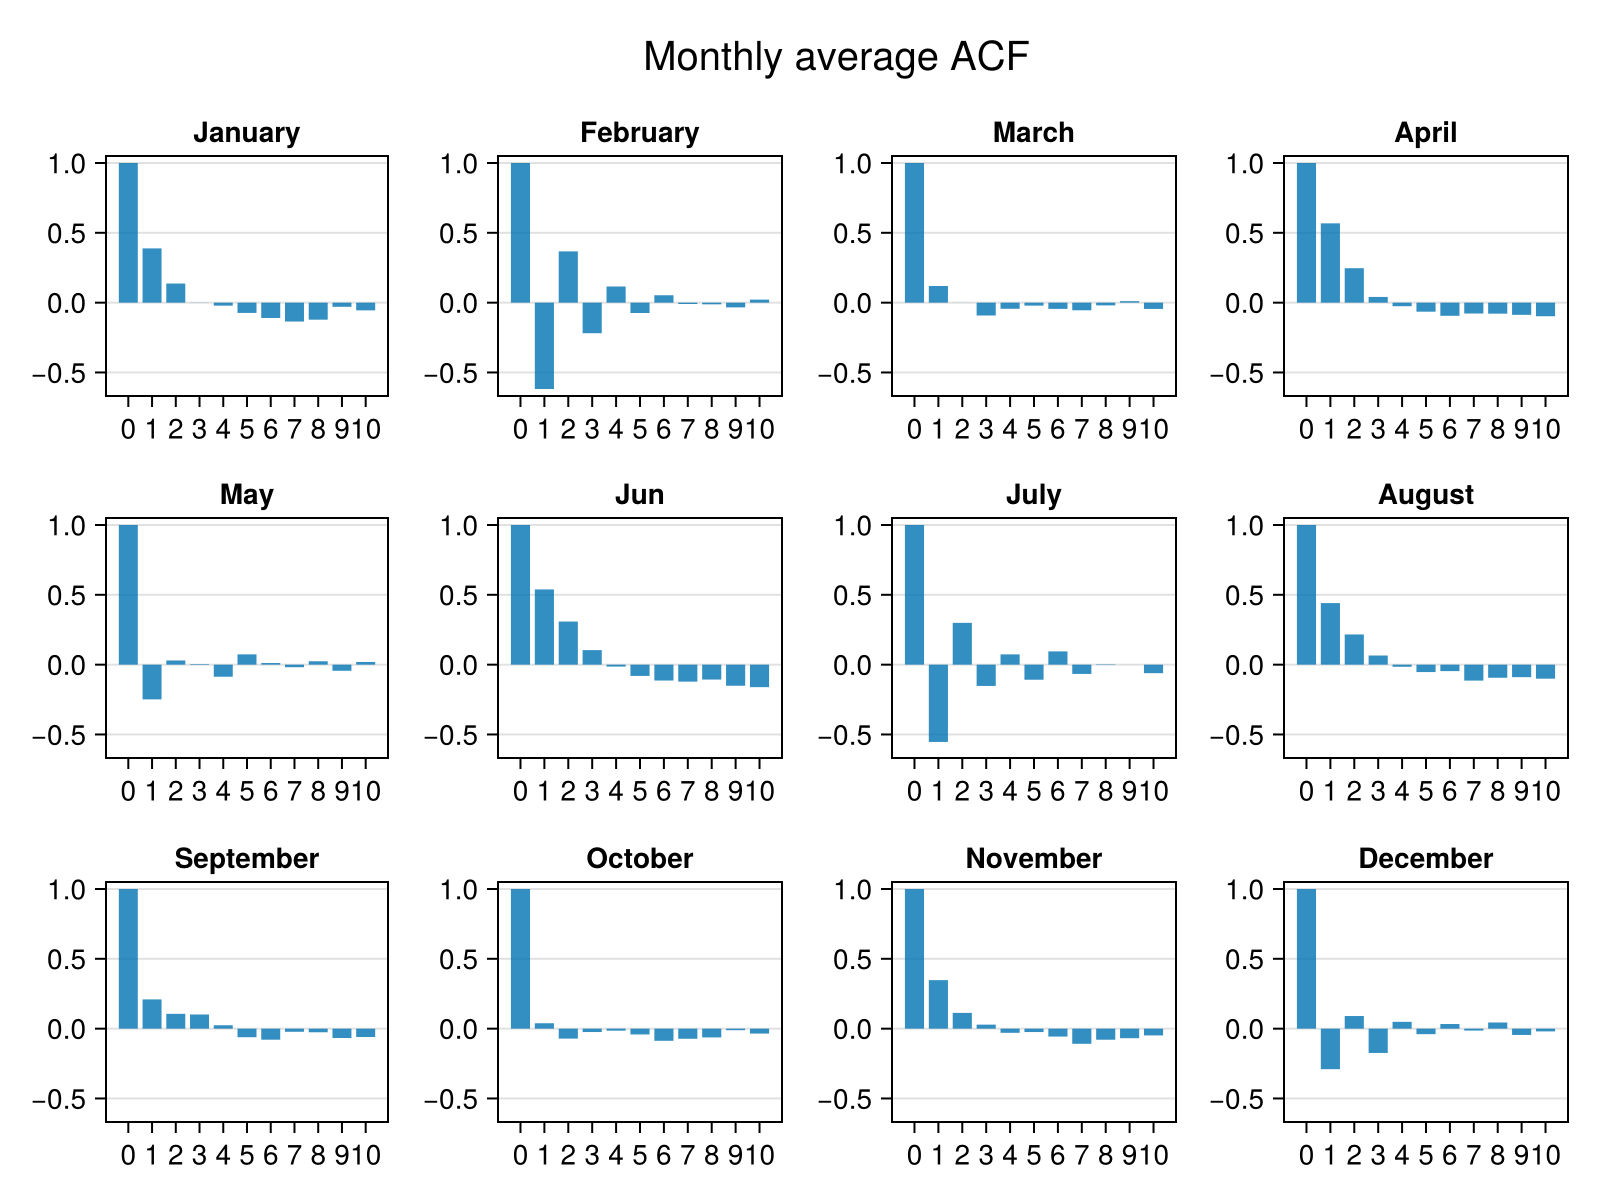

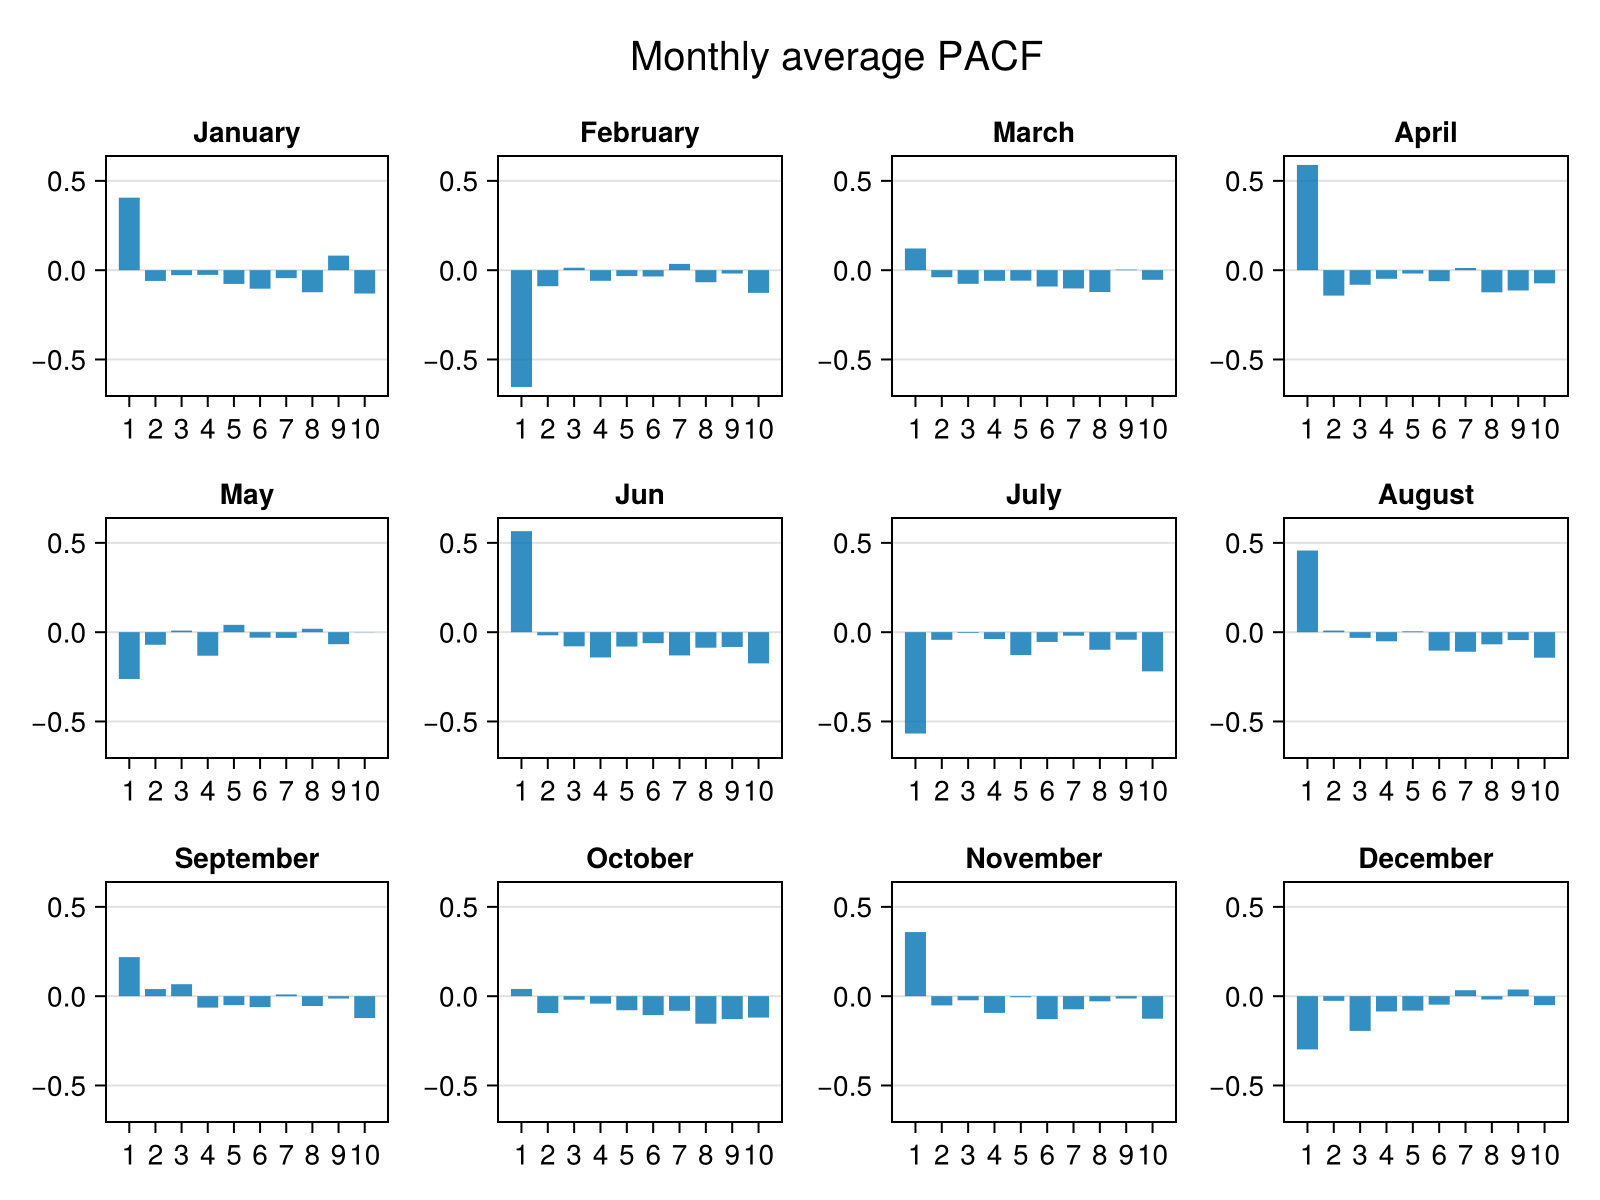

CairoMakie.Screen{IMAGE}


In [9]:
display(MonthlyACF(Monthly_temp))
display(MonthlyPACF(Monthly_temp))

## Estimating models

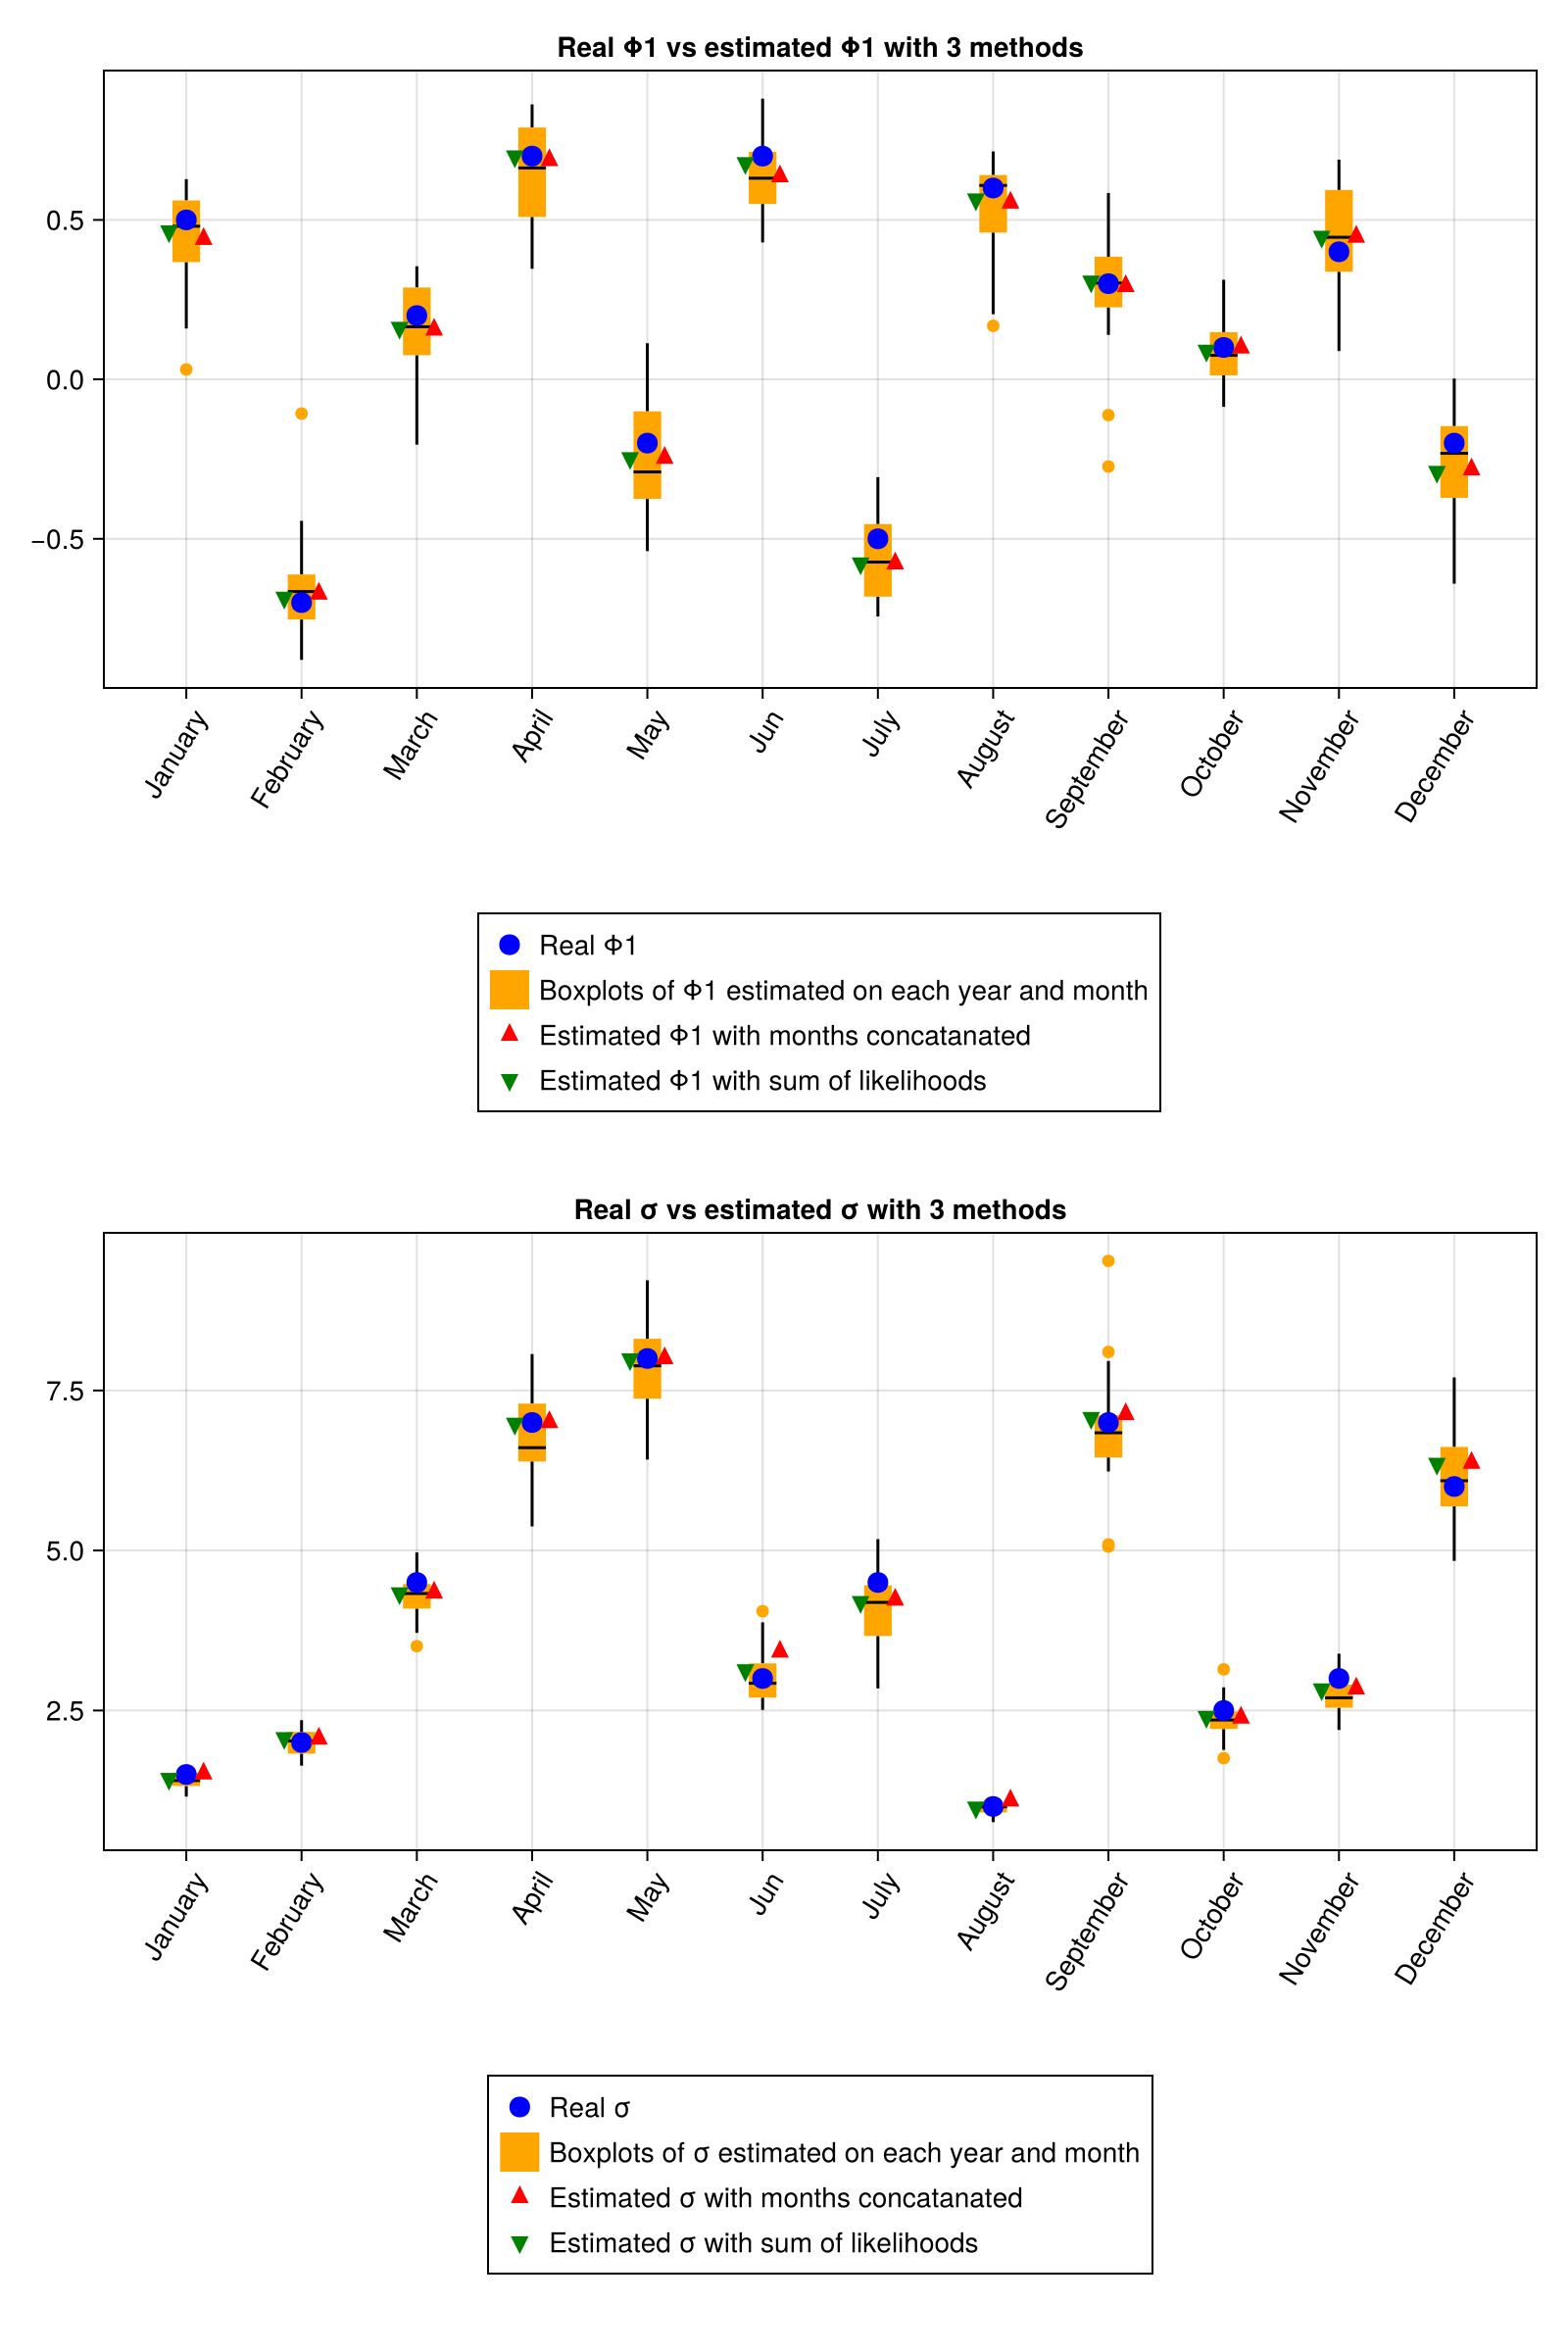

Row,Parameter,Month concatanation,Sum LL,mean of monthly parameters,median of monthly parameters
,String,Float64,Float64,Float64,Float64
1,Φ1,12.5992,12.1345,14.9461,12.9558
2,σ,4.54981,3.45354,4.20863,4.01018


6

In [10]:
include(raw"utils\Estimation.jl")
Parameters,autofig,PercentageErrorTable=AllEstimation(x,1,Date_vec=Date_vec,TrueParamVec=[Φ_month,σ_month])
display(autofig)
display(PercentageErrorTable)

In [11]:
Φ_vec, σ_vec = AutoTakeParameters((Parameters,PercentageErrorTable))
n_years=100
sim=SimulateYears([4.],Date(2001,1,1),Φ_vec, σ_vec,n_years)
sample_=invert(sim)

365-element Vector{Vector{Float64}}:
 [4.0, 0.686383551612064, -0.35956605835218575, -1.649818529034061, 0.6785566652413912, -0.7389525192593998, 3.382206146017552, -0.8922053100804899, 2.934295812482199, -2.118272597837104  …  -2.0331247382296502, -0.10060309957347213, -4.0579956613903025, -2.0785638310484207, -1.8440877599167405, -2.556208474516098, 4.004299900335142, -4.256568983172569, 3.9807661736433086, 4.639199633966991]
 [3.6771619625780394, -2.7035089739727263, 2.0895760244531716, -2.4418128676866537, 1.7637377122183662, 0.4536626778679645, 1.6848605730471518, 1.3458605263191683, 1.5270650066177656, -2.1050471566365863  …  0.2351159774822309, -0.012720770285743498, -1.3773876664365314, 1.7057328804828753, 0.6310802556065905, -2.061402023941551, 1.8115448270920649, -1.7138838250686899, 1.596843485882096, 1.8401497122875223]
 [0.11523338367336655, -2.422604443276607, -0.6690655476914967, -0.14889527402691805, -1.5895971622965779, -0.3566886036846061, 2.3587018025562356, 0.115364

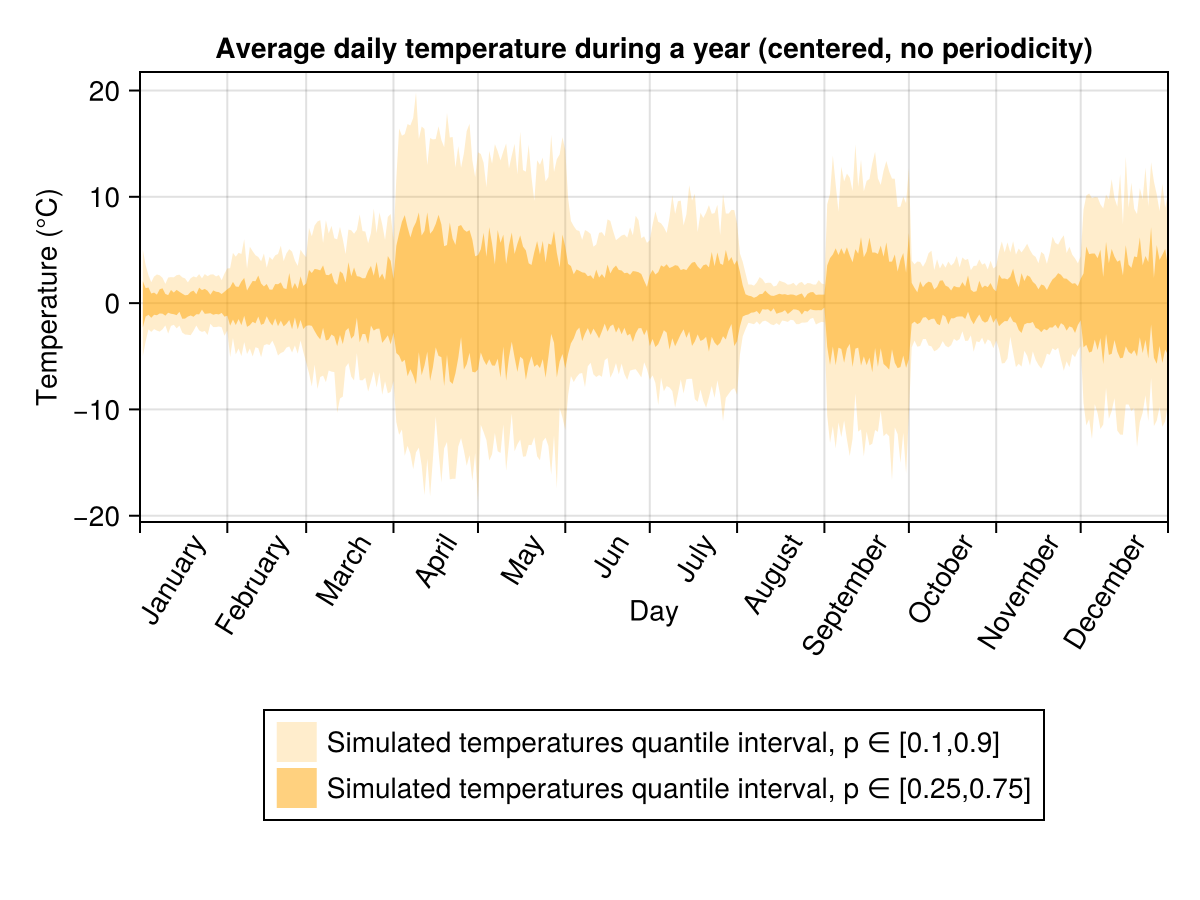

In [12]:
include("utils/Plotting.jl")
PlotYearCurves([],
["Simulated temperatures quantile interval, p ∈ [0.1,0.9]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered, no periodicity)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
)